## Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Отображение на графике области принятия решения

In [2]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0,
        decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
        levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

## Генерация выборки
| Вид класса | random_state | cluster_std | noise | centers |
|:----------:|:------------:|:-----------:|:-----:|:-------:|
|    blobs   |      34      |      1.5|   -   |    2    |

In [3]:
X, y = make_blobs(centers=2, random_state=34, cluster_std=1.5)

In [4]:
print("Координаты точек:\n", X[:15])
print("Метки класса: ", y[:15])

Координаты точек:
 [[ -9.4383967    2.85736287]
 [ -8.51188005   6.27823641]
 [ -9.13949465   3.63954101]
 [-12.37089043   7.15594338]
 [ -8.91150743   5.93048649]
 [ -9.54177266   3.84185898]
 [-10.90214655   2.04849828]
 [ -9.50825238   7.74690079]
 [ -7.00867273   3.01451428]
 [ -9.70678044   7.57851126]
 [-10.37004706   3.06762603]
 [ -7.36974408   2.34416931]
 [ -9.27756446   3.32067295]
 [ -6.7484923    3.58902355]
 [-10.17439185   2.344658  ]]
Метки класса:  [1 0 0 0 0 1 1 0 1 0 1 1 1 1 1]


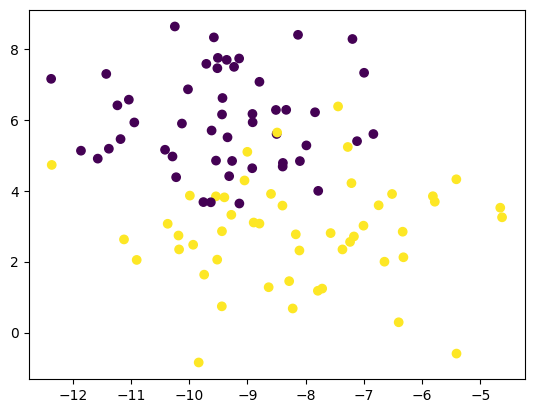

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

### Обучающая выборка

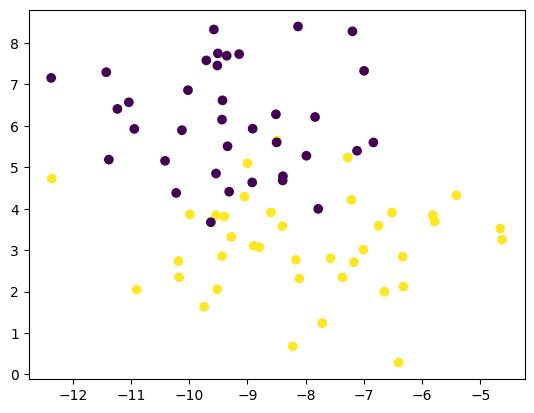

In [7]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

### Тестовая выборка

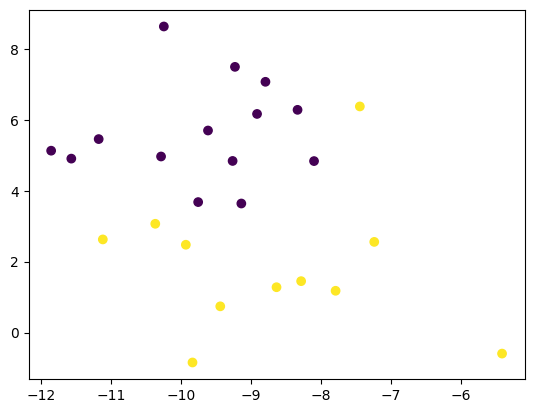

In [8]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

## Обучение модели и классификация

In [9]:
def print_classification_metrics(classifier, X, y, prediction, y_test):
    print("Предстказанные и истинные значения")
    print(prediction)
    print(y_test)
    
    print("Матрица ошибок")
    print(confusion_matrix(y_test, prediction))
    print("Точность классификации: ", accuracy_score(prediction, y_test))
    print("Значения полноты, точности, f1-меры и аккуратности")
    print(classification_report(y_test, prediction))
    print("Значение площади под кривой ошибок (AUC ROC)")
    print(roc_auc_score(y_test, prediction))
    print("Область принятия решений")
    plt.xlabel("first feature")
    plt.ylabel("second feature")
    plot_2d_separator(knn, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
    plt.show()

### Метод k-ближайших соседей

n_neightbors =  1
Предстказанные и истинные значения
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[13  1]
 [ 1 10]]
Точность классификации:  0.92
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Значение площади под кривой ошибок (AUC ROC)
0.9188311688311689
Область принятия решений


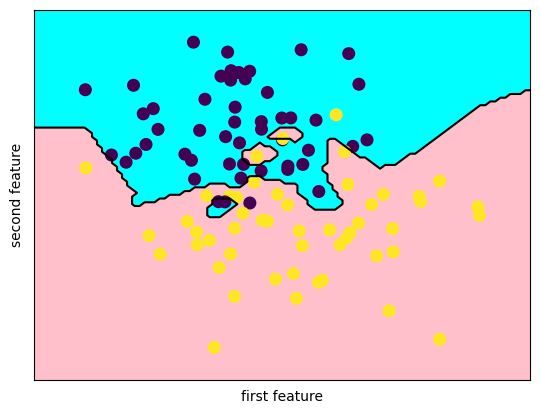

n_neightbors =  3
Предстказанные и истинные значения
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[12  2]
 [ 1 10]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8831168831168832
Область принятия решений


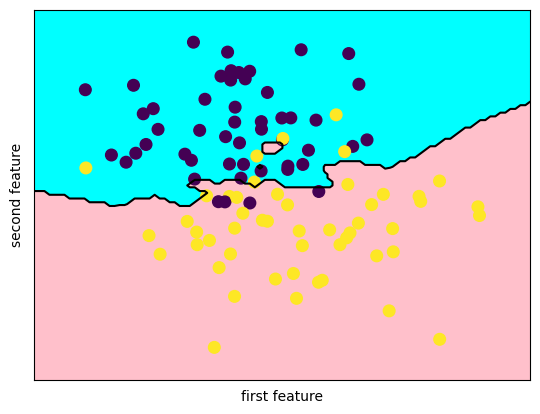

n_neightbors =  5
Предстказанные и истинные значения
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[12  2]
 [ 1 10]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8831168831168832
Область принятия решений


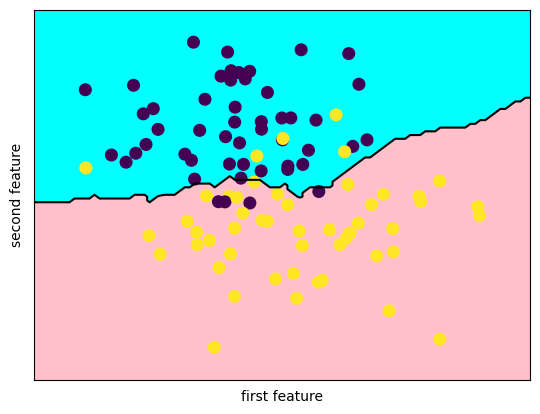

n_neightbors =  9
Предстказанные и истинные значения
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[12  2]
 [ 1 10]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8831168831168832
Область принятия решений


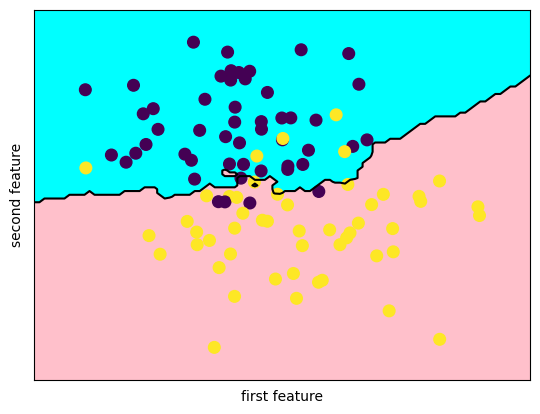

In [10]:
for i in [1, 3, 5, 9]:  
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    print("n_neightbors = ", i)
    print_classification_metrics(knn, X, y, prediction, y_test)

### Наивный байесовский метод

Предстказанные и истинные значения
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[12  2]
 [ 1 10]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8831168831168832
Область принятия решений


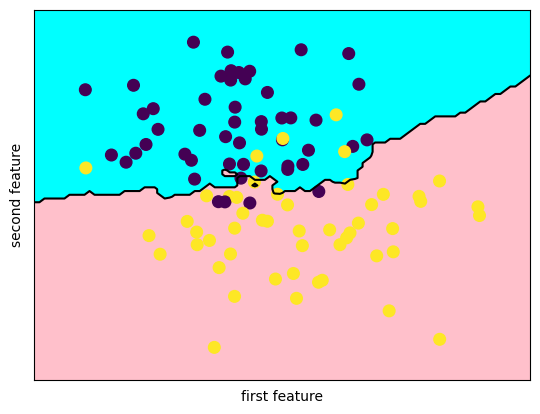

In [11]:
naive = GaussianNB()
naive.fit(X_train, y_train)
predict = naive.predict(X_test)
print_classification_metrics(naive, X, y, predict, y_test)

### Случайный лес

n_estimators =  5
Предстказанные и истинные значения
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[12  2]
 [ 1 10]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8831168831168832
Область принятия решений


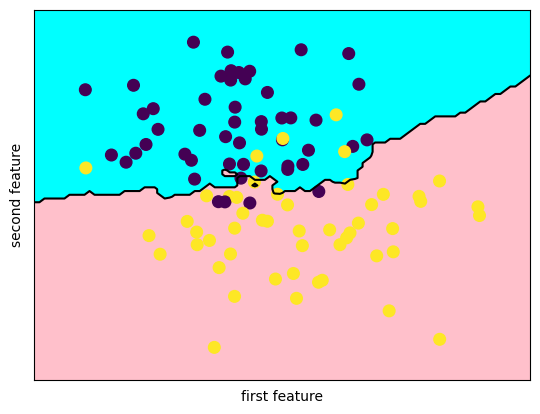

n_estimators =  10
Предстказанные и истинные значения
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[12  2]
 [ 1 10]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8831168831168832
Область принятия решений


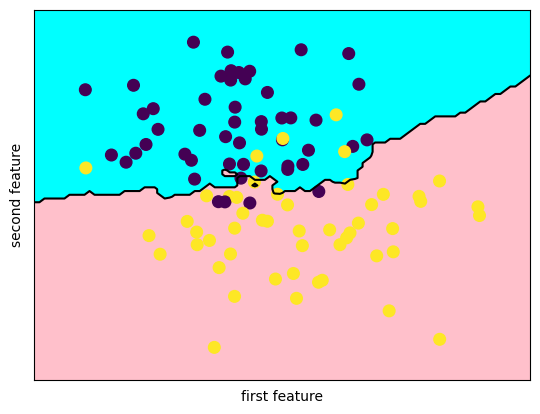

n_estimators =  15
Предстказанные и истинные значения
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[13  1]
 [ 1 10]]
Точность классификации:  0.92
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Значение площади под кривой ошибок (AUC ROC)
0.9188311688311689
Область принятия решений


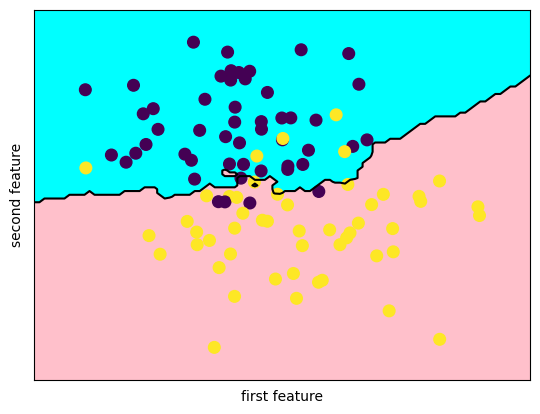

n_estimators =  20
Предстказанные и истинные значения
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[13  1]
 [ 1 10]]
Точность классификации:  0.92
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Значение площади под кривой ошибок (AUC ROC)
0.9188311688311689
Область принятия решений


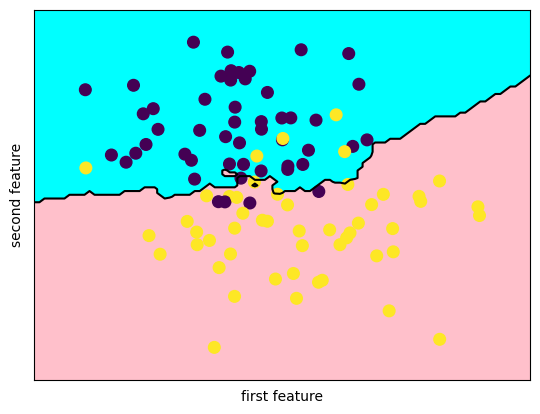

n_estimators =  50
Предстказанные и истинные значения
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]
Матрица ошибок
[[13  1]
 [ 1 10]]
Точность классификации:  0.92
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Значение площади под кривой ошибок (AUC ROC)
0.9188311688311689
Область принятия решений


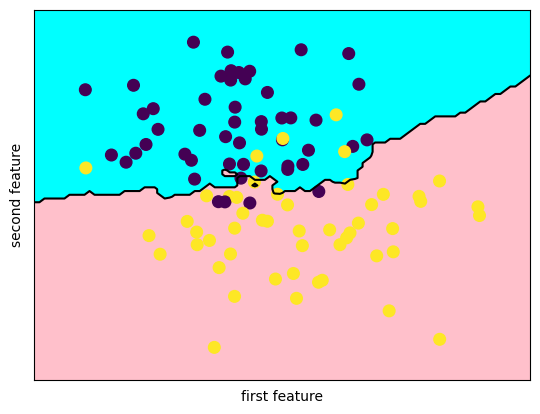

In [12]:
for i in [5, 10, 15, 20, 50]:  
    rand_forest = RandomForestClassifier(n_estimators=i)
    rand_forest.fit(X_train, y_train)
    prediction = rand_forest.predict(X_test)
    print("n_estimators = ", i)
    print_classification_metrics(knn, X, y, prediction, y_test)